In [1]:
import tensorflow as tf #pip install tensorflow 
import cv2 # pip install opencv-python,pip install opencv-contrib-python xlanh
import os
import matplotlib.pyplot as plt #pip install matplotlib      hien thi anh
import numpy as np # pip install numpy

In [2]:
img_array = cv2.imread("Training/0/Training_3908.jpg")

In [3]:
img_array.shape

(48, 48, 3)

In [4]:
print(img_array)

[[[163 163 163]
  [128 128 128]
  [114 114 114]
  ...
  [139 139 139]
  [141 141 141]
  [134 134 134]]

 [[147 147 147]
  [114 114 114]
  [102 102 102]
  ...
  [142 142 142]
  [138 138 138]
  [138 138 138]]

 [[112 112 112]
  [106 106 106]
  [ 92  92  92]
  ...
  [140 140 140]
  [141 141 141]
  [134 134 134]]

 ...

 [[139 139 139]
  [141 141 141]
  [136 136 136]
  ...
  [154 154 154]
  [171 171 171]
  [191 191 191]]

 [[140 140 140]
  [133 133 133]
  [120 120 120]
  ...
  [138 138 138]
  [146 146 146]
  [158 158 158]]

 [[136 136 136]
  [134 134 134]
  [113 113 113]
  ...
  [146 146 146]
  [144 144 144]
  [144 144 144]]]


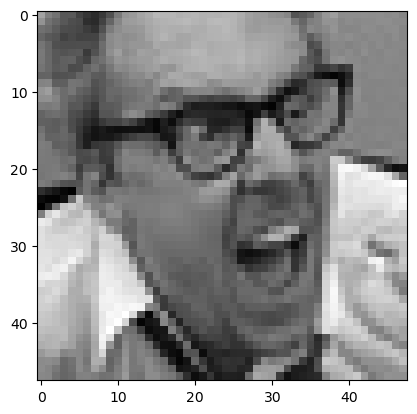

In [5]:
plt.imshow(img_array)

In [6]:
Datadirectory="Training/" # training dataset

In [7]:
Classes = ["0","1","2","3","4","5","6"] 

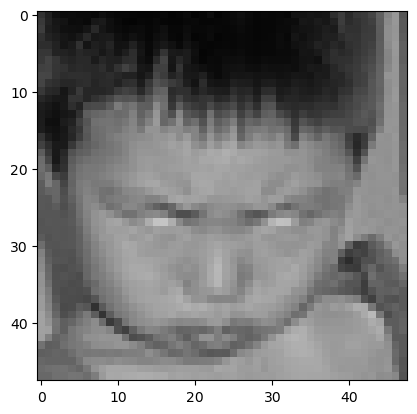

In [8]:
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

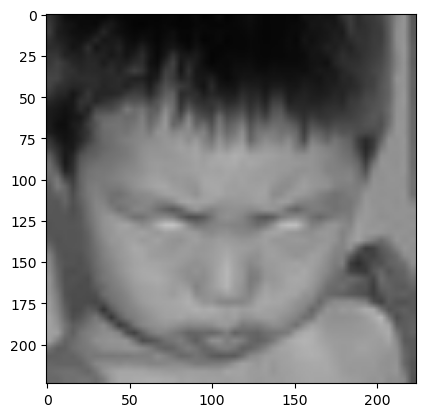

In [9]:
#chagesize
img_size= 224 #imgnet->224x224
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()


In [10]:
new_array.shape

(224, 224, 3)

In [11]:
#read all img ,save to array
training_Data = [] #save in dataarray
def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory,category)
        class_num = Classes.index(category) # 0,1 label
        for img in os.listdir(path): 
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                    pass
                #training_Data: 2 column : [arrray, num]

In [12]:
create_training_Data()

In [13]:
print(len(training_Data))

28709


In [14]:
#tron data
import random 
random.shuffle(training_Data)

In [15]:
X = [] #data feature / img
y = [] # label / num
for features, label in training_Data:
    X.append(features)
    y.append(label)
    
X = np.array(X, dtype=np.float32).reshape(-1, img_size, img_size, 3)


In [16]:
X.shape

(28709, 224, 224, 3)

In [17]:
#normalize data
X= X/225.0;

In [18]:
Y = np.array(y)

In [19]:
Y.shape

(28709,)

In [20]:
#deep learning model -- Transfer Learning

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [22]:
model = tf.keras.applications.MobileNetV2() #pre-trained model

In [23]:
model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [24]:
#transfer learning
#giu trong so
model.trainable = False

# Lấy đầu vào của mô hình cơ sở
base_input = model.input

In [25]:
base_input

<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=None, name=keras_tensor>

In [26]:
base_output = model.layers[-2].output #k lay dong cuoi cung -1

In [27]:
base_output

<KerasTensor shape=(None, 1280), dtype=float32, sparse=False, name=keras_tensor_154>

In [28]:
final_output = layers.Dense(128)(base_output) #adding new layer, after the output of global pooling layer
final_output = layers.Activation('relu')(final_output) #acctivation func
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation='softmax')(final_output)

In [29]:
final_output

<KerasTensor shape=(None, 7), dtype=float32, sparse=False, name=keras_tensor_160>

In [30]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [31]:
new_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,430,663 (9.27 MB)

 Trainable params: 172,679 (674.53 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [32]:
new_model.compile(loss="sparse_categorical_crossentropy",optimizer = "adam", metrics = ["accuracy"])

In [33]:
#new_model.fit(X,Y,epochs = 15)

In [34]:
#new_model.save('Final_model_95p07.h5')

In [35]:
new_model = tf.keras.models.load_model('Final_model_95p07.h5')

In [50]:
frame = cv2.imread("angrywoman.jpg")

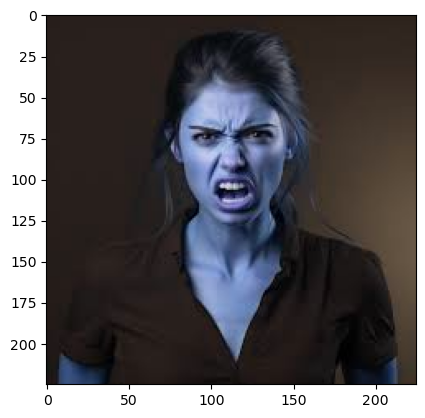

In [51]:
plt.imshow(frame)

In [52]:
frame.shape

(225, 225, 3)

In [53]:
#face detect althogim(gray img) link : data/haarcascades/haarcascade_frontalface_default.xml
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [54]:
gray= cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [55]:
gray.shape

(225, 225)

In [56]:
#opencv code detecct face
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame,(x, y),(x+w, y+h),(255,0,0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0 :
        print("Face not detected")
    else: 
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex+ew]

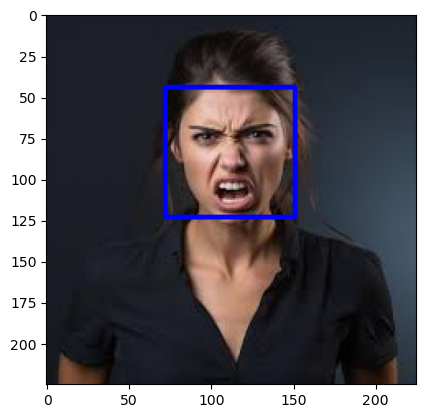

In [57]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

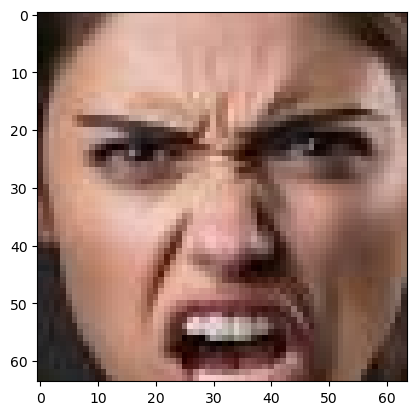

In [58]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [59]:
final_image = cv2.resize(face_roi,(224,224))
final_image = np.expand_dims(final_image,axis=0) #fourth dimension
final_image = final_image/255.0 #normalizing


In [60]:
Predictions = new_model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


In [61]:
Predictions[0]

array([9.2809457e-01, 3.6945715e-04, 5.4150894e-02, 2.0519232e-03,
       2.5040825e-04, 1.4725145e-02, 3.5769492e-04], dtype=float32)

In [62]:
np.argmax(Predictions)

0

In [63]:
if np.argmax(Predictions) == 0:
    print("angry")
elif np.argmax(Predictions) == 1:
    print("disgust")
elif np.argmax(Predictions) == 2:
    print("fear")
elif np.argmax(Predictions) == 3:
    print("happy")
elif np.argmax(Predictions) == 4:
    print("neutral")
elif np.argmax(Predictions) == 5:
    print("sad")
elif np.argmax(Predictions) == 6:
    print("surprised")


angry
